## BUSINESS UNDERSTANDING

In the 21st Century, communication has been improved from letters and word of mouth to data transmission through text, voice, audio or video across the globe. This has been contributed by the development of telephone and transmission mediums that supports it like radio, wire and optics through which they transmit the data. The world has greatly embraced this technology to the extent that almost every single person has a mobile phone. This development has lead to the development of companies that offer communication support services.
When many companies offering similar products and services arise, consumers usually have a wide range of choices in regards to which services and service provider to consider. Therefore, customer satisfaction and checks to ensure that customers are likely to purchase the products are important as the company stays in business because of monetary rewards generated from the sale of their products. The above project is aimed at helping the management of SyriaTel Telecommunication company discover whether their customers will remain in business with them and  the amount of money lost when customers don’t stay in business with them.

Objectives for the project include:
   > • Predict the average sales for a Telecommunication company using the available information from SyriaTel.

   > • Predict amount of money that could be lost by a Telecommunication company when a customer stopped purchasing their products in regards to SyriaTel.

   > • Predict the likelihood of a customer stopping doing business with SyriaTel.
   
   > • Study the existence of patterns that might predict possibility of  customers stopping doing business with SyriaTel. 

The project seeks to answer:
   > • What is the average sales for SyriaTel per day?

   > • What is the amount of money that can be lost when a customer is lost?
   
   > • Are customers likely to stop doing business with SyriaTel?

By conducting the above project, the management for SyriaTel Telecommunication company will be enlightened to know their average sales per day and the probability of losing their customers and the lose they will undergo if a customer failed to subscribe.

## DATA UNDERSTANDING

In [263]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeRegressor

In [214]:
# opening the data
df = pd.read_csv('Data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [215]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [216]:
df.shape

(3333, 21)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [218]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

The dataset (dt) was provided by the client (SyriaTel) from their Database. It has 3333 rows, and 21 columns with data types ; **booleans(bool), integers(int64), strings(object), and float(float64)**.

From the columns, the Phone number column will be dropped as it will not be used and for security purposes.

In [219]:
#new df
df = df.drop('phone number', axis='columns')
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## DATA PREPARATION

> ### i. Data Cleaning

In [220]:
# Checking for duplicates
def duplicated(x):
    duplicates = []
    duplicates.append(x.duplicated().sum())
    for dups in duplicates:
        if dups >= 1 :
            print(f'There are duplicates')
        elif dups == 0:
            print(f'No duplicates')
        else:
            print(f'Error')
        
duplicated(df)


No duplicates


In [221]:
# Checking for Null values
def identify_missing_values(x):
    missing = []
    for i in df.isnull().any():
        missing.append(i)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        output = print("The Data has no missing values")
    else:
        output = print("The Data has missing values.")

    return output


identify_missing_values(df)

The Data has no missing values


In [222]:
# Checking for the unique values in the Dataset.
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

The dataset has no duplicates or missing values. However, the phone number column is in string formart instead of integers. Therefore, since it is not going to affect the analysis, the column will be dropped.

In [223]:
# categorical columns 

df.select_dtypes(include=['object', 'bool']).head()


,state,international plan,voice mail plan,churn
0,KS,no,yes,False
1,OH,no,yes,False
2,NJ,no,no,False
3,OH,yes,no,False
4,OK,yes,no,False


In [224]:
# numerical columns
df.select_dtypes(include=['int64','float64']).head()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


After separating the columns into those that had categorical data and those that had numerical data, we get the categorical data columns to contain four columns; State, international plan, voice mail plan, and churn. Those that had numerical were 16 columns (the rest). From the separated data, we don't have any column that contains a wrong data type hence they are well classified.

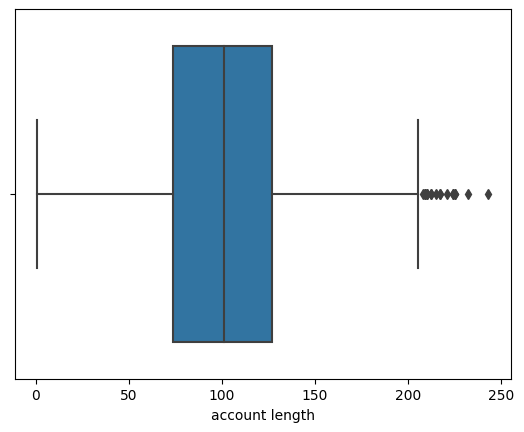

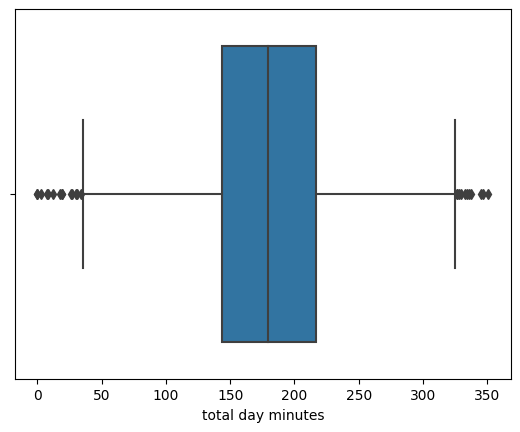

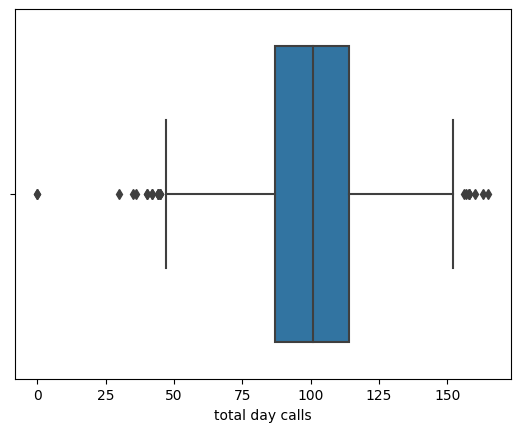

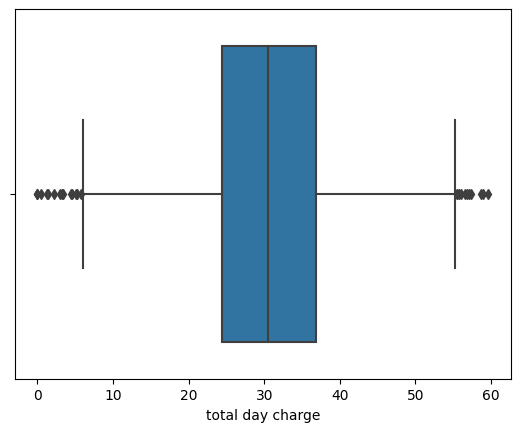

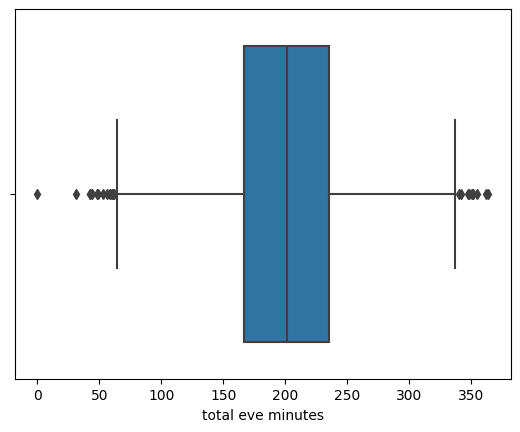

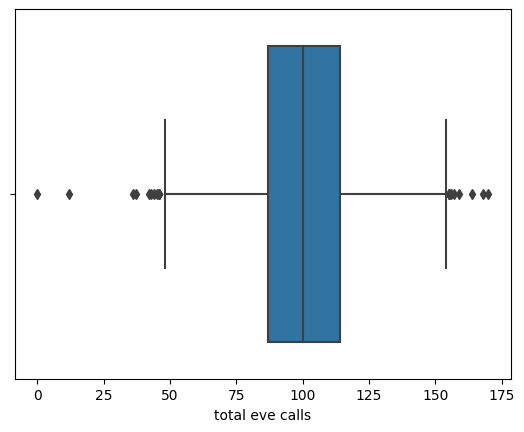

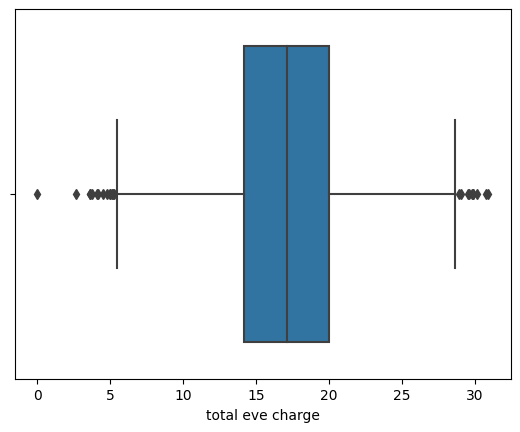

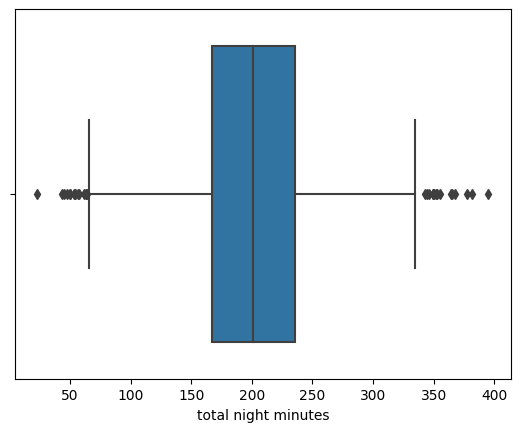

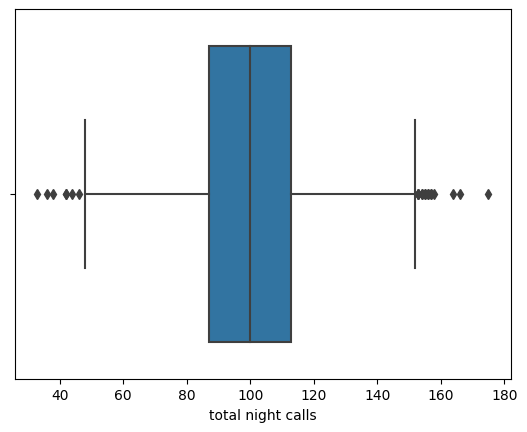

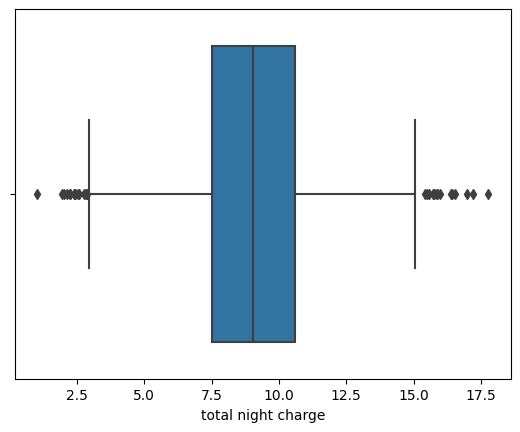

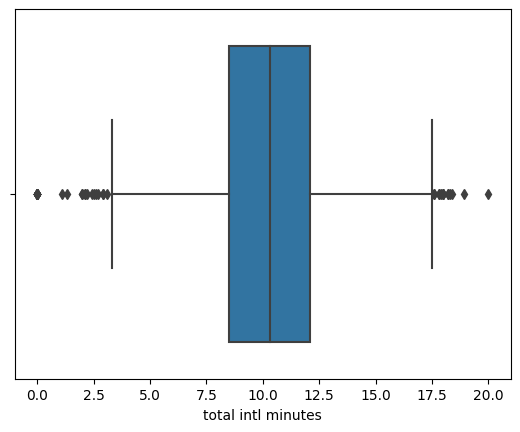

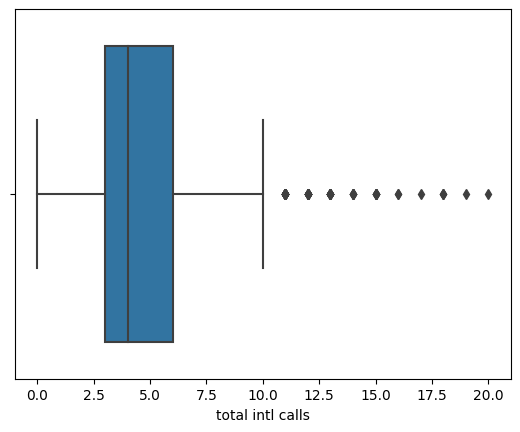

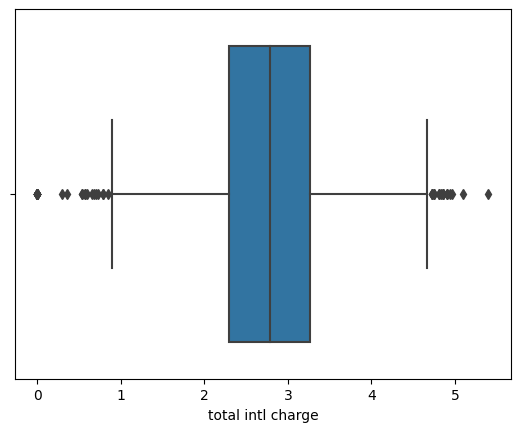

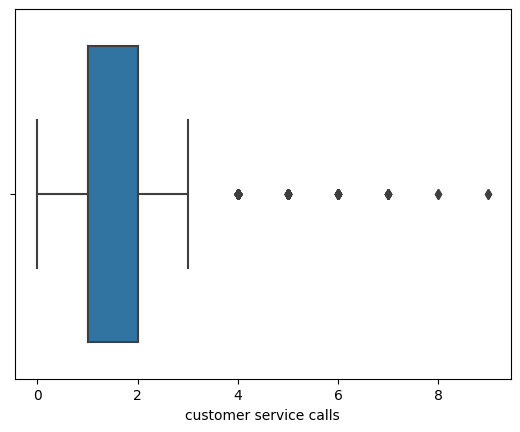

In [225]:
# Checking for Outliers.

num_cols =  df.select_dtypes(include=['int64','float64'])
num_cols.drop(['area code','number vmail messages'], axis=1, inplace=True)

for num in num_cols:
    sns.boxplot(x=df[num])
    plt.show()
 


The box plots for the dataset show the presense of outliers in the data tha needs to be delt with for a proper functioning of the sysytem. The outliers were imputated by replaceing with the median to avoid lose of data by droping.

In [226]:
# Removing outliers 
for col in num_cols: 
    q1 = df[col].quantile(0.20)
    q3 = df[col].quantile(0.80)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    df = df.loc[(df[col] > range_low) & (df[col] < range_high)]

df.shape

(3218, 20)

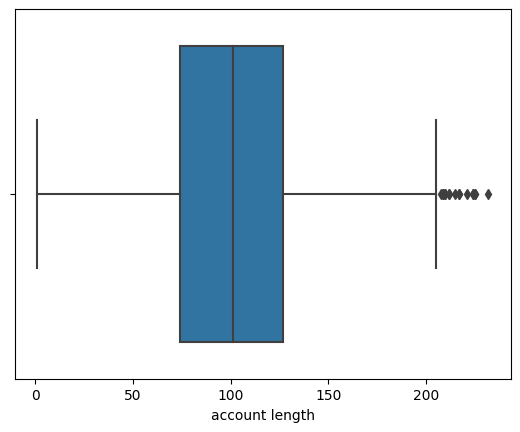

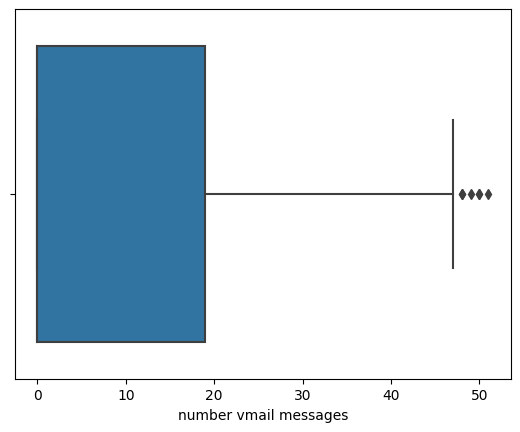

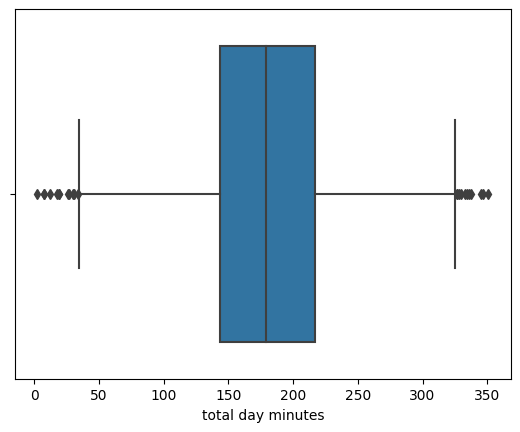

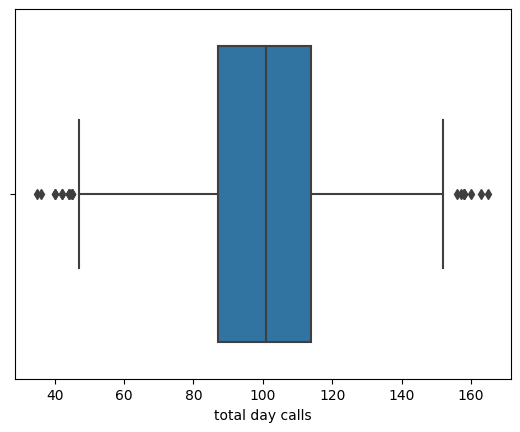

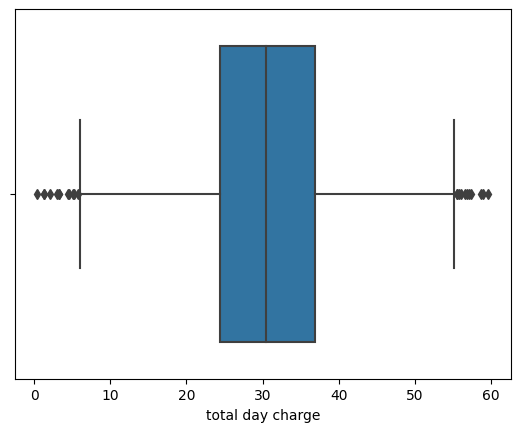

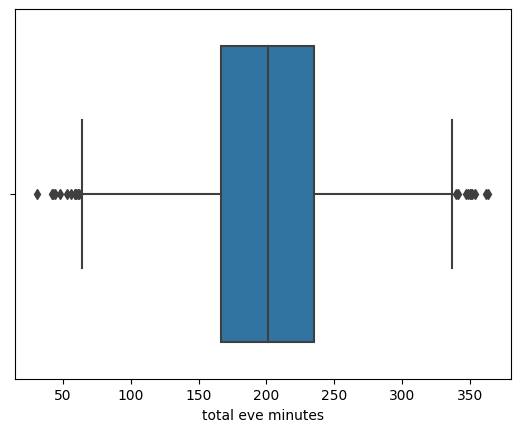

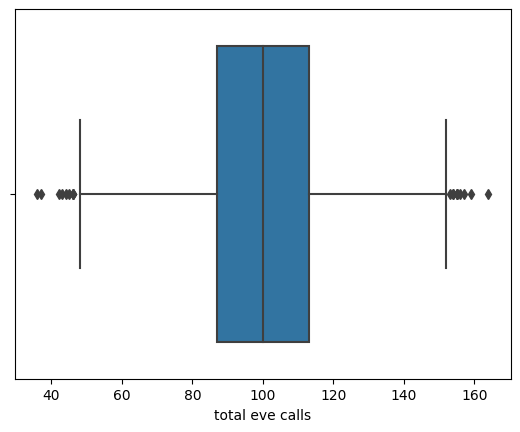

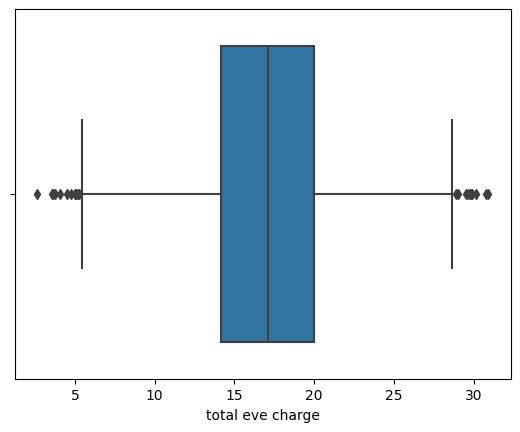

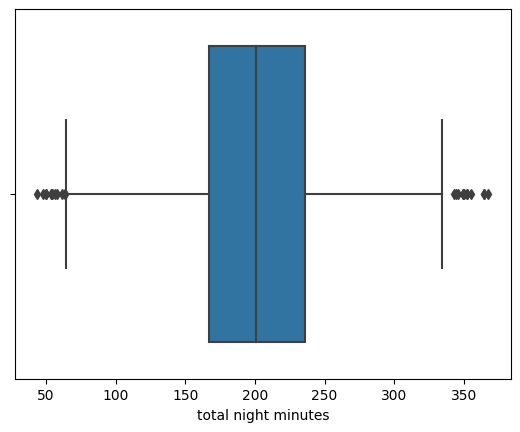

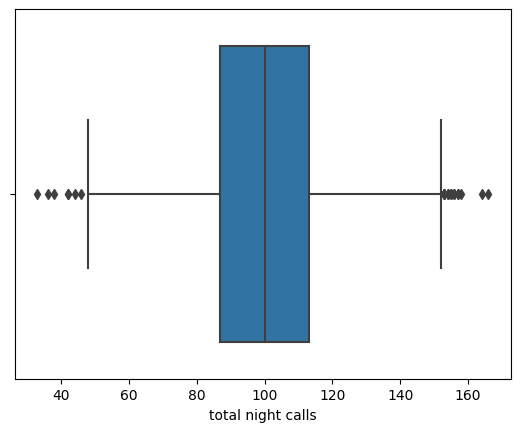

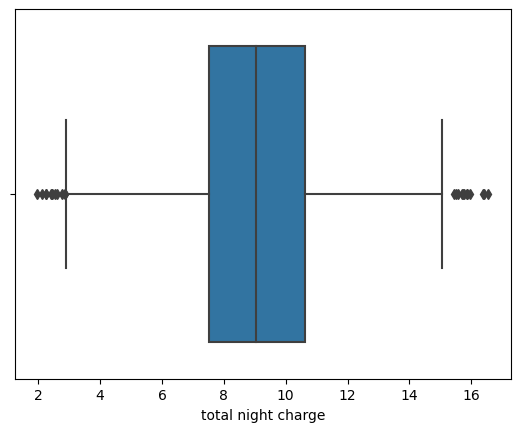

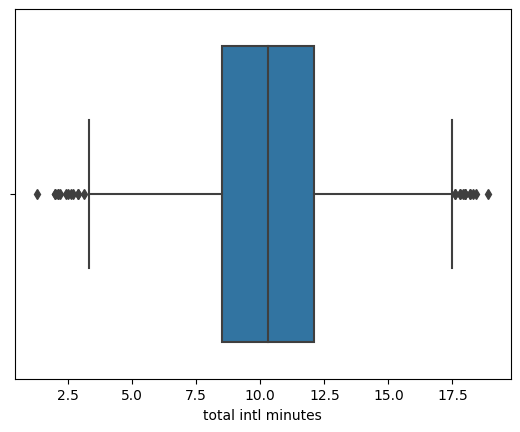

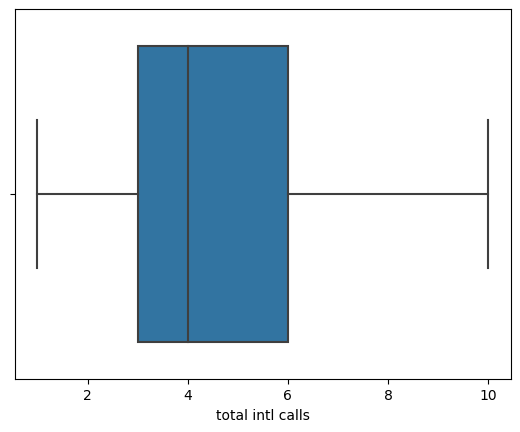

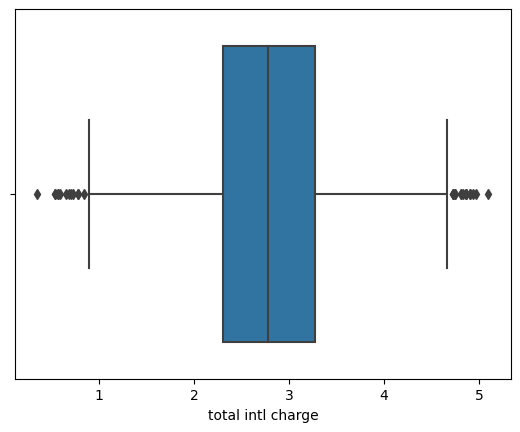

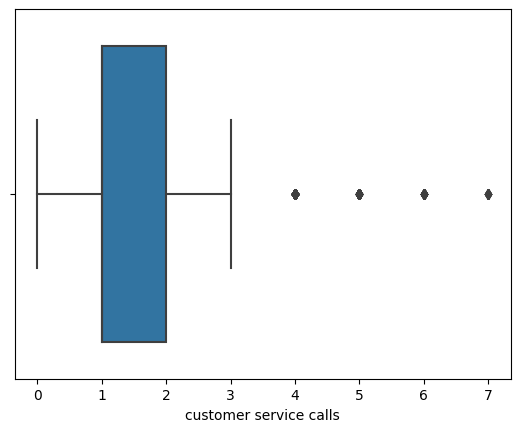

In [227]:
num_cols =  df.select_dtypes(include=['int64','float64'])
num_cols.drop(['area code'], axis=1, inplace=True)

for num in num_cols:
    sns.boxplot(x=df[num])
    plt.show()

The above box plots after removing the outliers has been modified by removing those data points that were farther from the rest. A 20% trim has been applied on the data set. Therefore, the new data set has 3216 rows and 20 columns.

>### ii. EDA

>> #### 1. Univariant Analysis

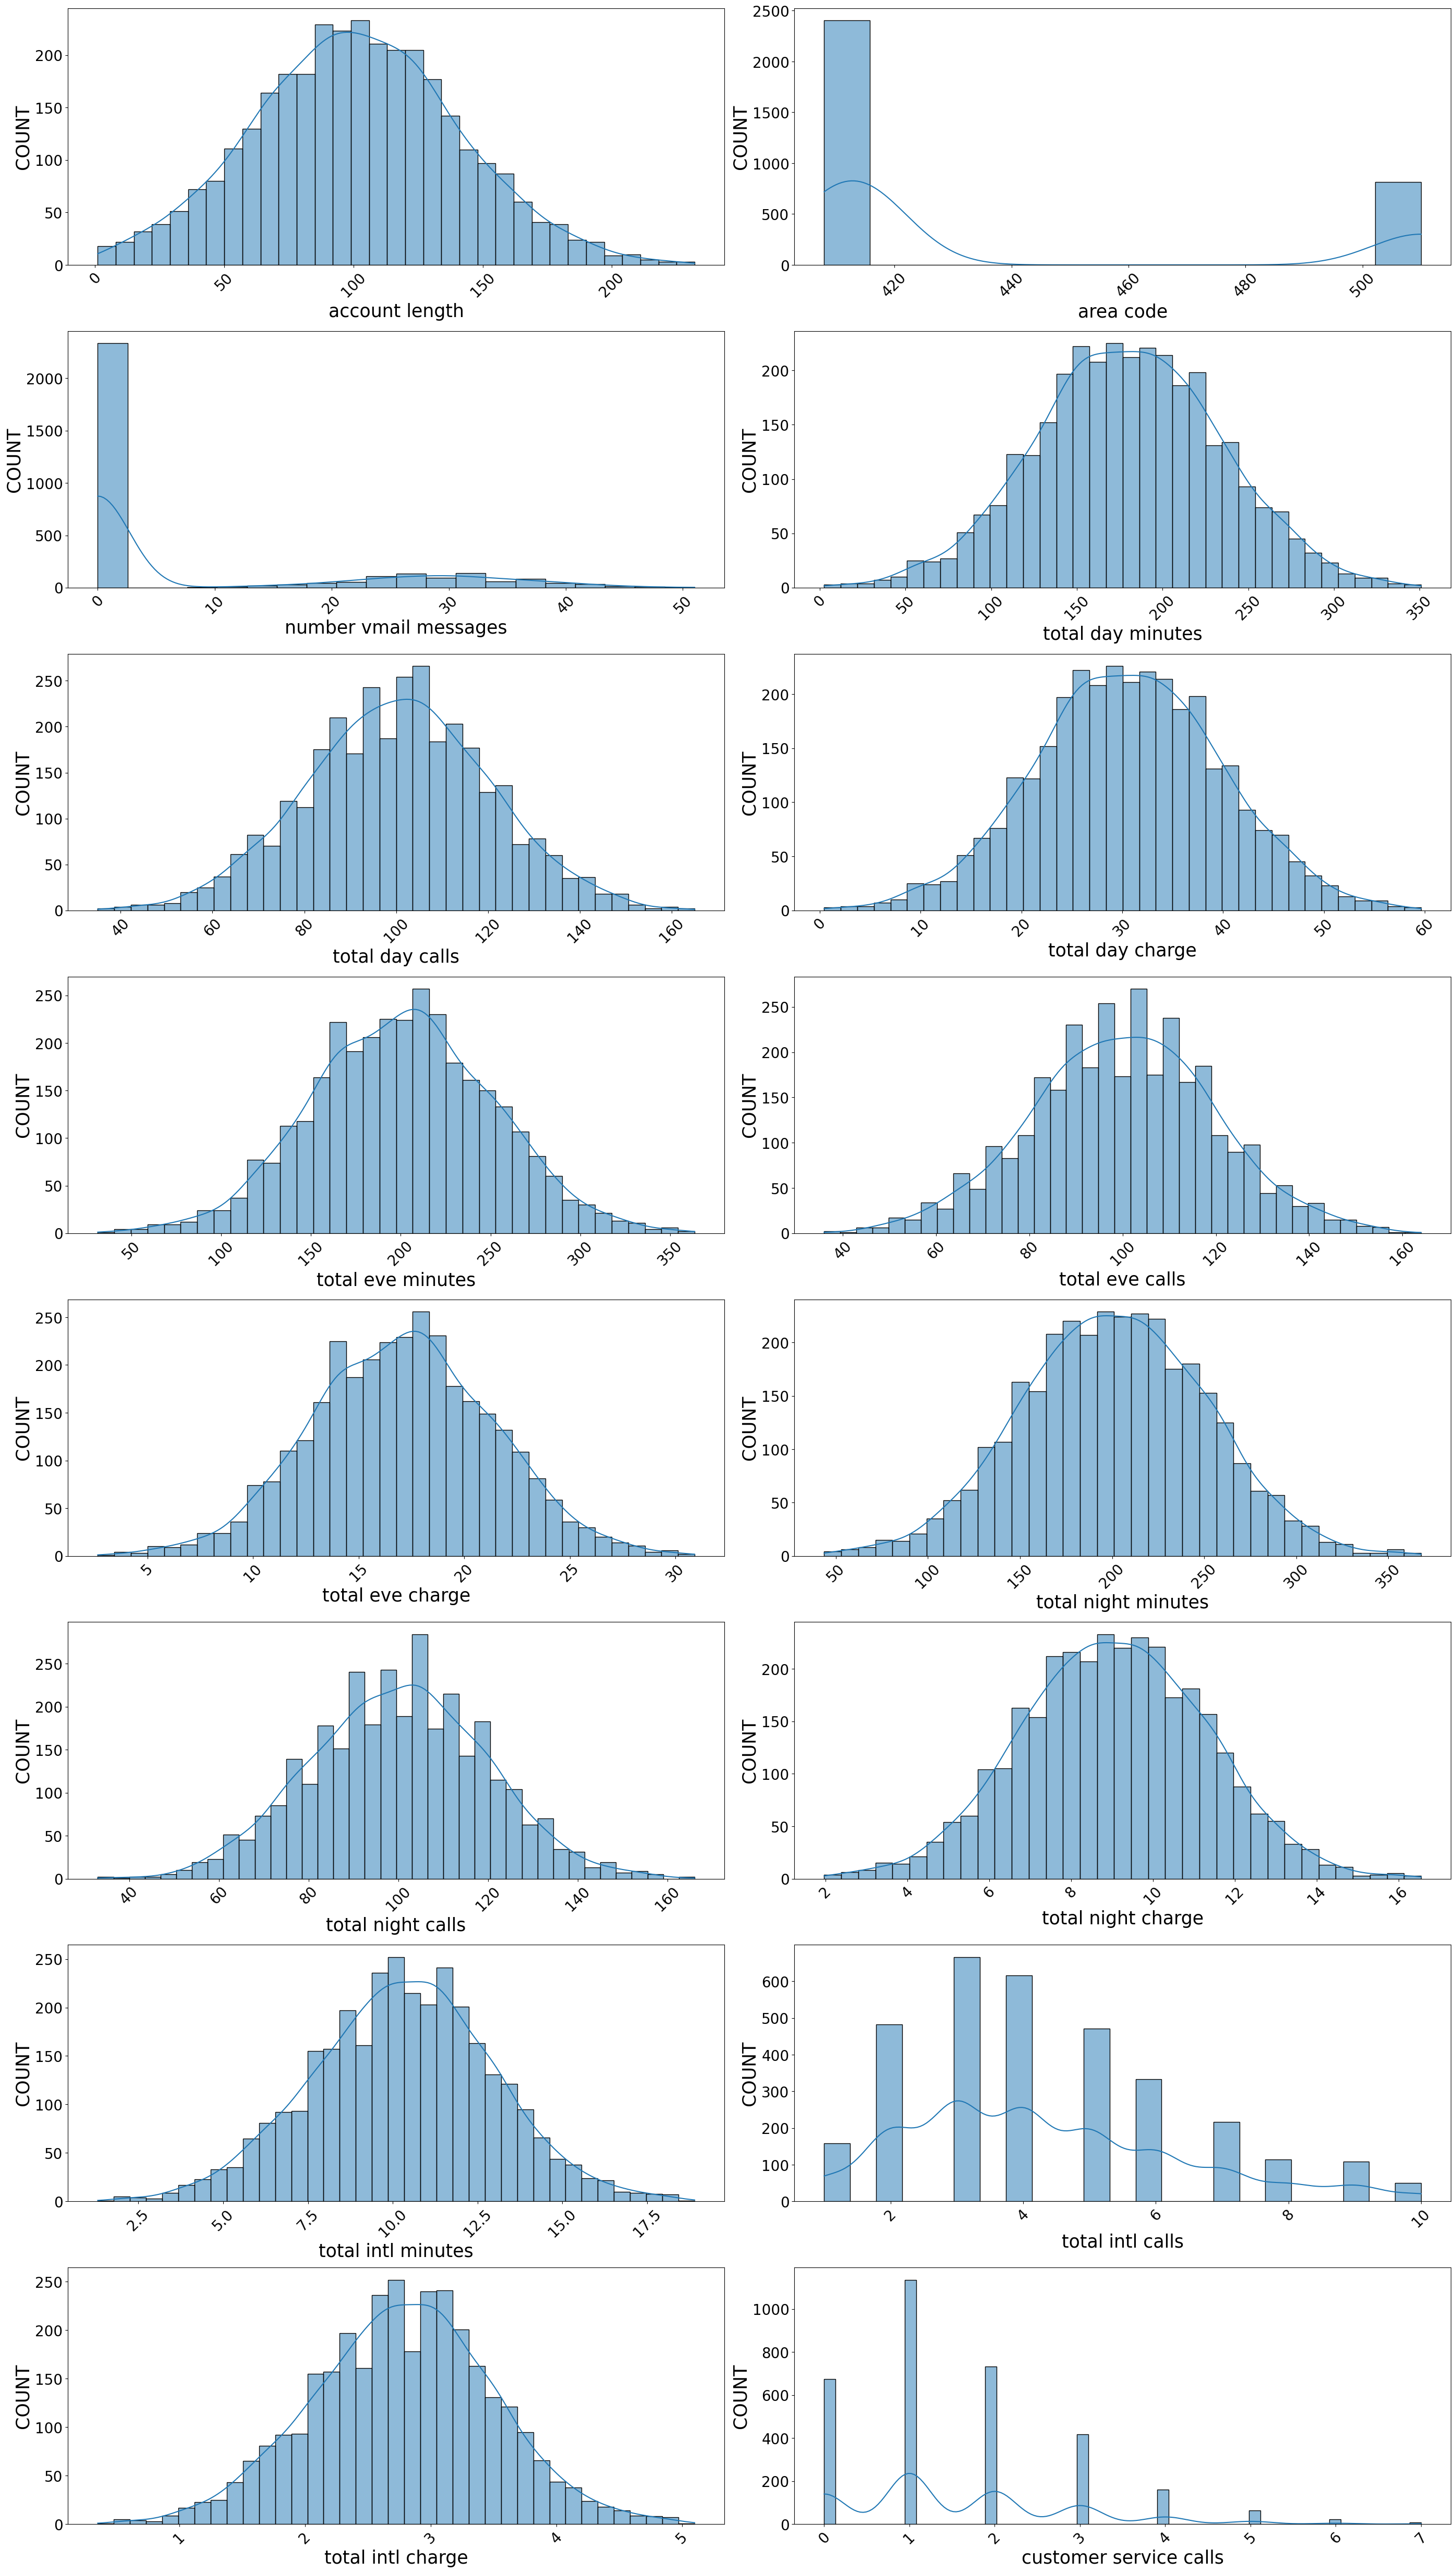

In [228]:
# numerical data.
fig = plt.figure(figsize=(28,160))
num_cols = df.select_dtypes(['int64', 'float64']).columns.tolist()
for index, col in enumerate(num_cols):
    plt.subplot(26,2,index+1)
    sns.histplot(x=col, data=df,kde=True)
    plt.ylabel('COUNT', size = 25)
    plt.xlabel(col, fontsize = 25)
    plt.xticks(size = 20, rotation = 45 )
    plt.yticks(size = 20)
fig.tight_layout(pad=1.0)

The distribution of the graphs above shows that: 
> majority of the graphs are uniformly distributed.
> Customer service calls made per day per state was very low since its mode was 1 customer service call.
> International calls costed around 3 dollars with their lenghth being around 11 minutes per state.
> Across all the states, minutes of calls during the various parts of the day i.e Day, evening, and night range at around 200 minutes per state. However, talking charges is diffrent depending on the time of day making calls made at night being the cheapest as they only cost around 8 dollars per minutes while those made during the day being most expensive as they cost the customers about 35 dollars per minute.

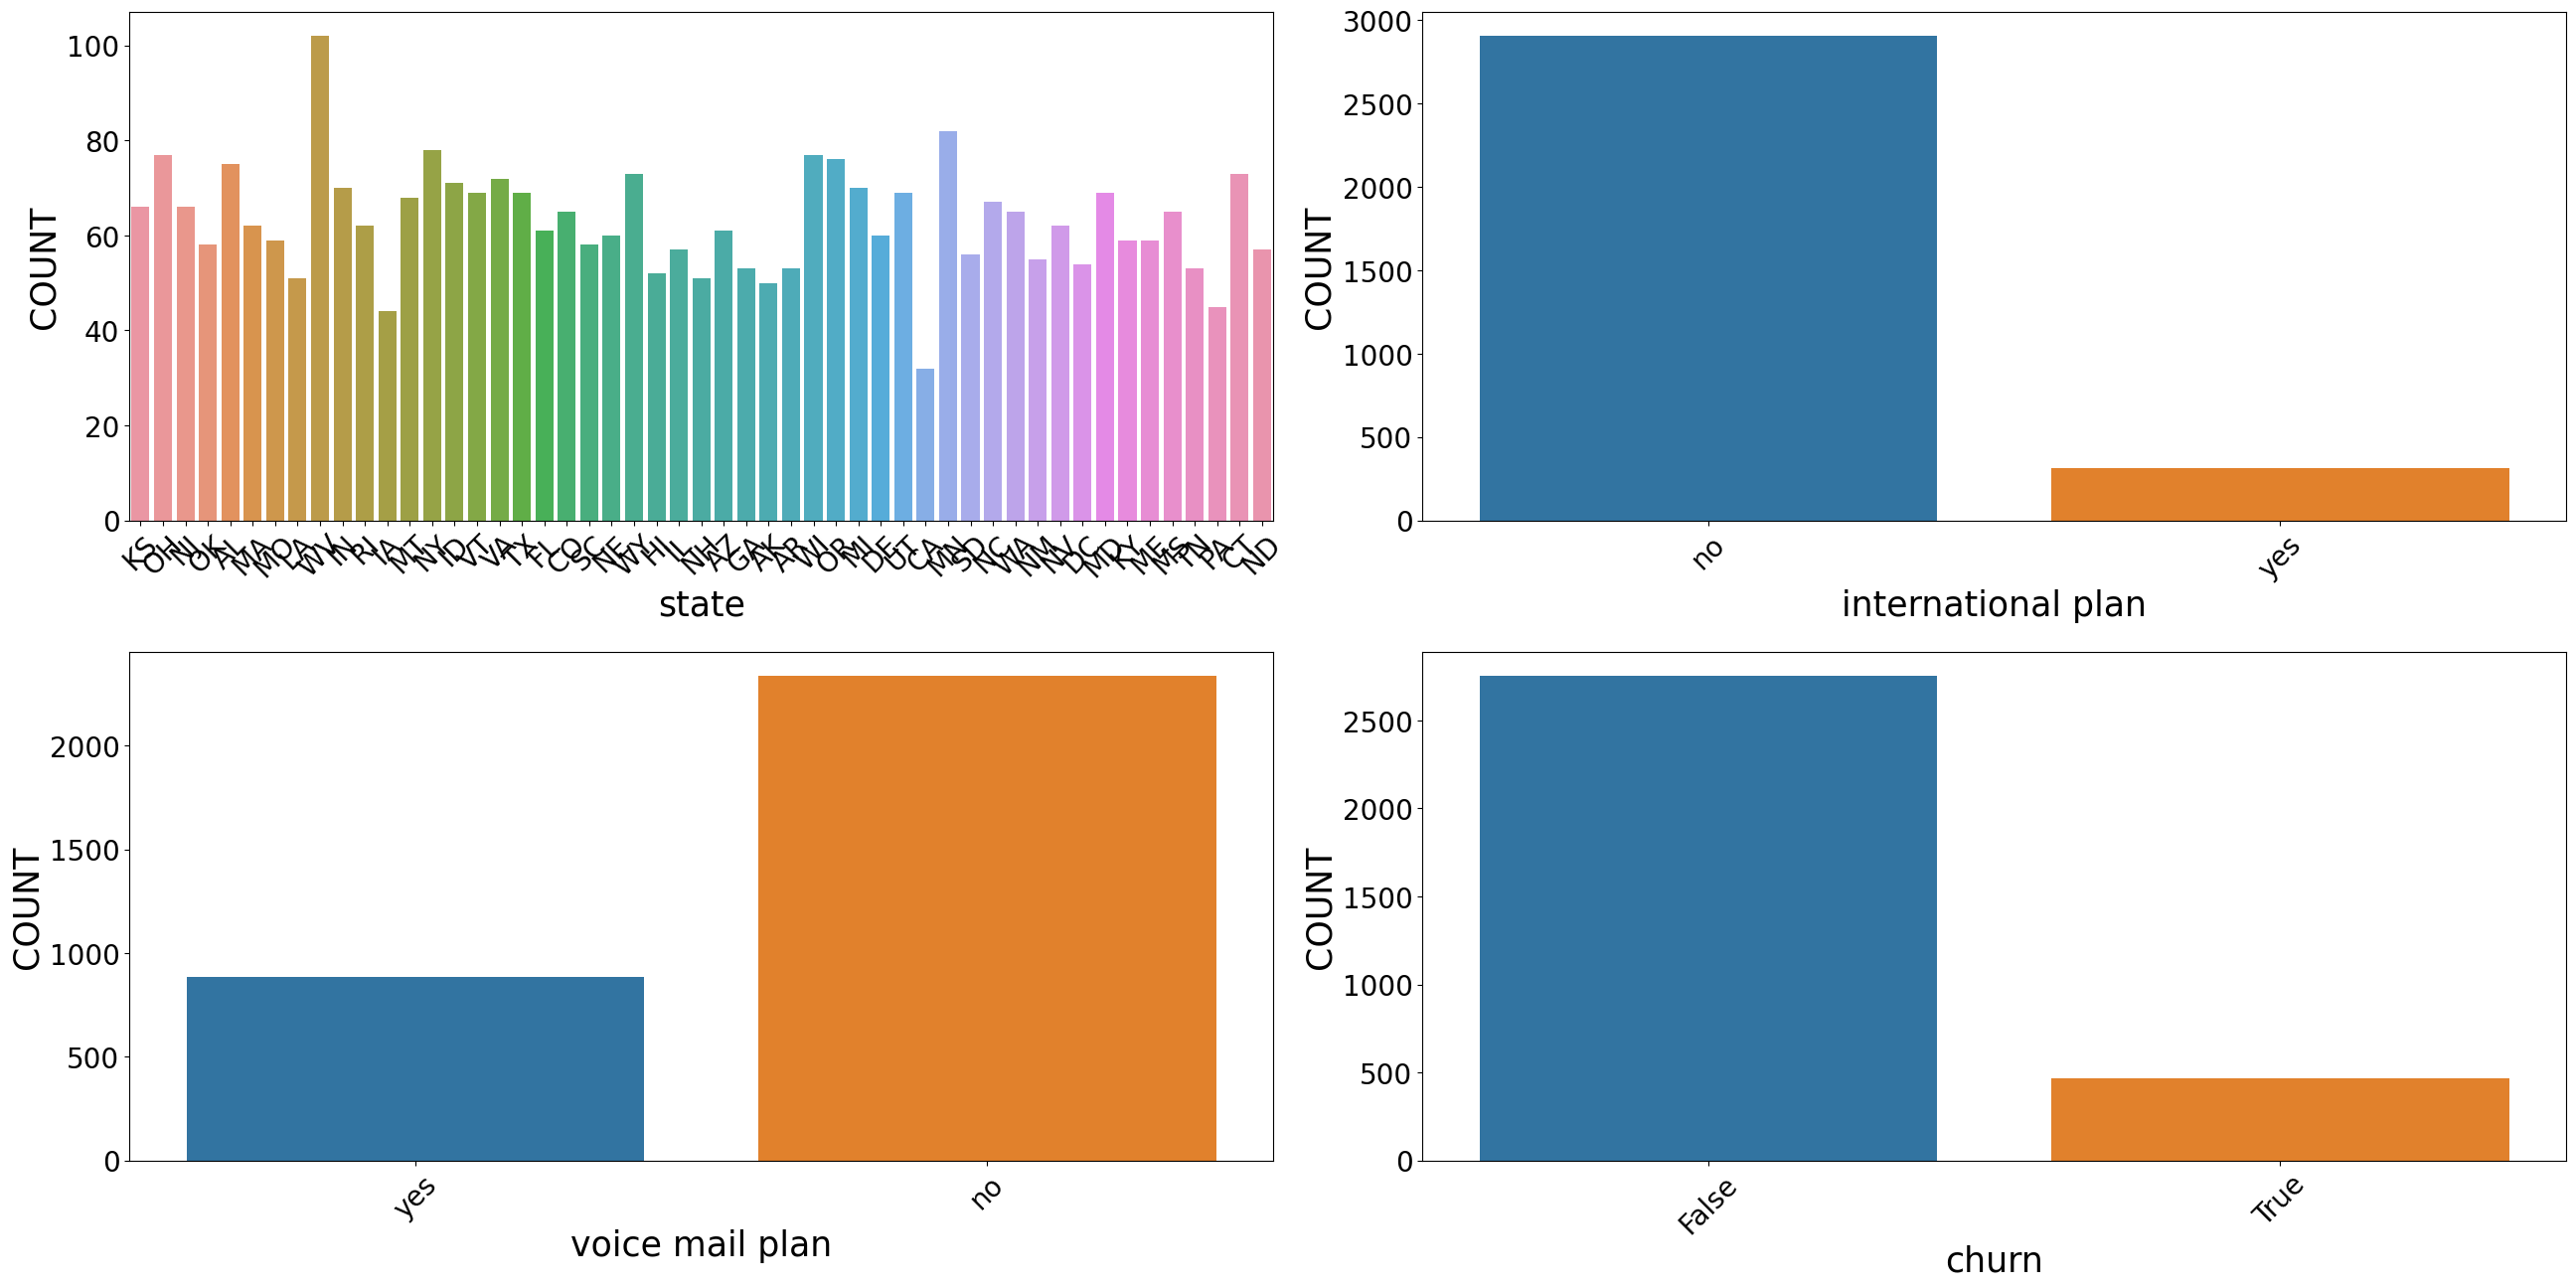

In [229]:
# Categorical Data
fig = plt.figure(figsize=(26,160))
cat_vars = df.select_dtypes(['object','bool']).columns.tolist()
for index, col in enumerate(cat_vars):
    plt.subplot(25,2,index+1)
    sns.countplot(x=col, data=df)
    plt.ylabel('COUNT', size = 25)
    plt.xlabel(col, fontsize = 25)
    plt.xticks(size = 20, rotation = 45)
    plt.yticks(size = 20)
fig.tight_layout(pad=1.0)

Customers in the the diffrent states seem to have low subscription to international plans with those who have subscribed being lower than 16% of the sample.Generally, we see that most customers have very low subscription to the diffrent plans offered since those subscribed to voice mail plan is also very low. However, the churn rate is relatively low making it evident that most of their customers are loyal and they mainly stick around regardless.

> #### 2. Bivariant analysis

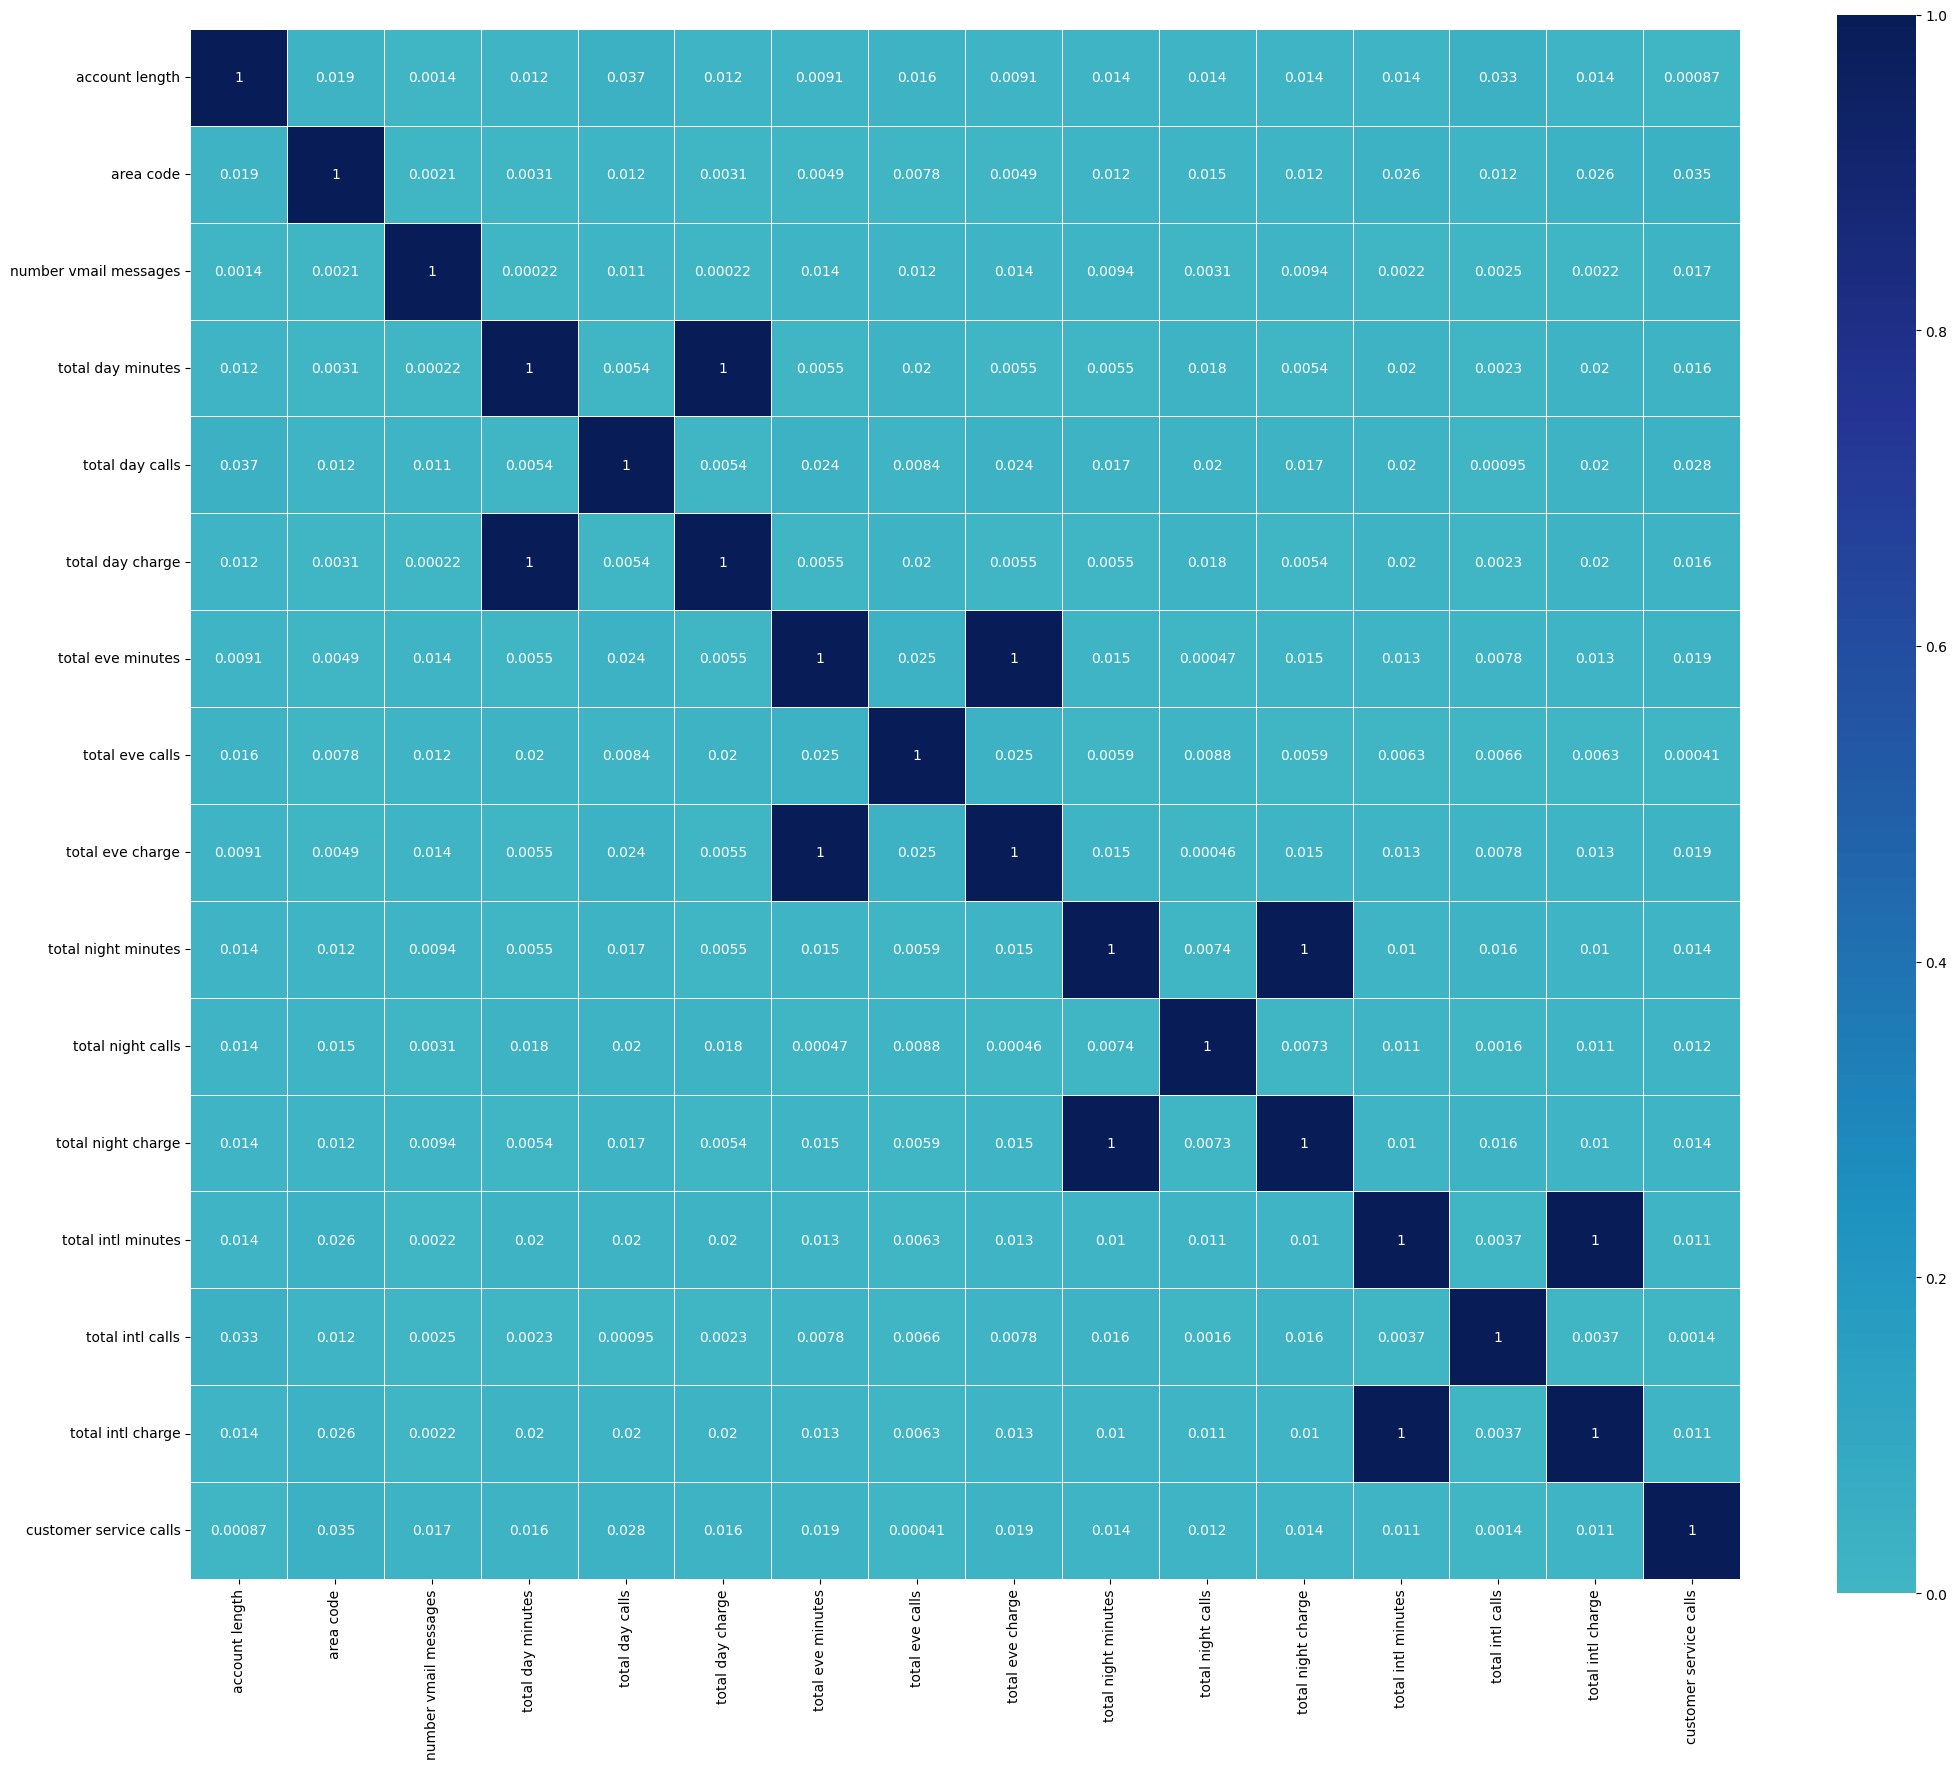

In [230]:
#Check correlation for numerical data


plt.figure(figsize=(25,25))
sns.heatmap(abs(df.select_dtypes(['int64', 'float64']).corr()), linewidths=.5, vmin=0, vmax=1, cbar_kws={'shrink': .82}, 
            annot=True, cmap='YlGnBu', center=0, square=True);

In [231]:
# function for plotting the scatter plots
def scatterplot(df, x_col, y_col, hue_col):
    """Plots a scatterplot between two variables in a pandas DataFrame"""
    x_data = df[x_col]
    y_data = df[y_col]
    hue = df[hue_col]
    sns.scatterplot(data=df, x=x_data, y=y_data, hue=hue_col)

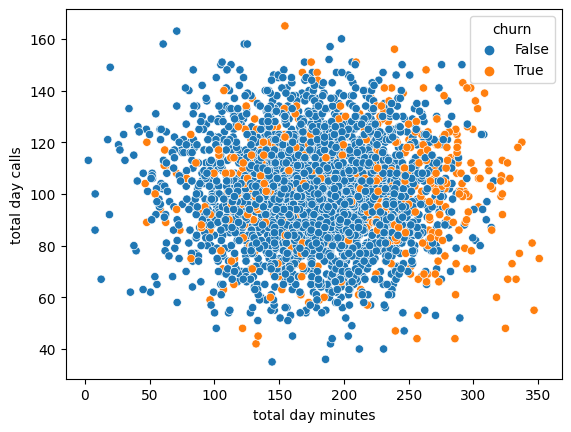

In [232]:
scatterplot(df, 'total day minutes', 'total day calls', 'churn')

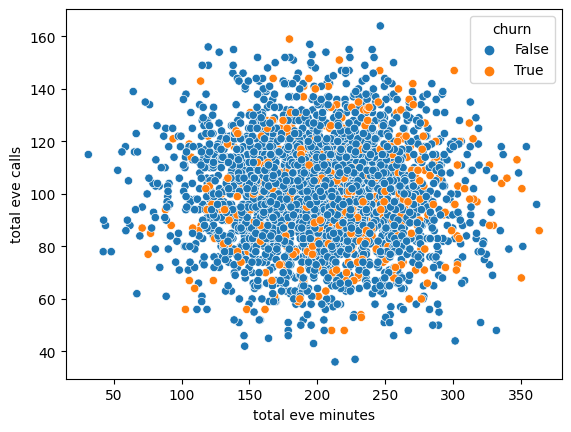

In [233]:
scatterplot(df, 'total eve minutes', 'total eve calls', 'churn')

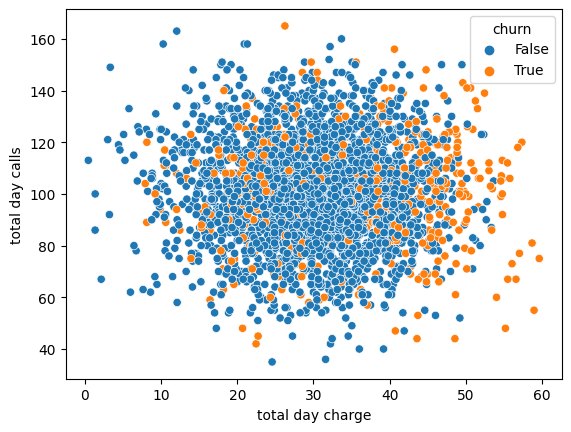

In [234]:
scatterplot(df, 'total day charge', 'total day calls', 'churn')

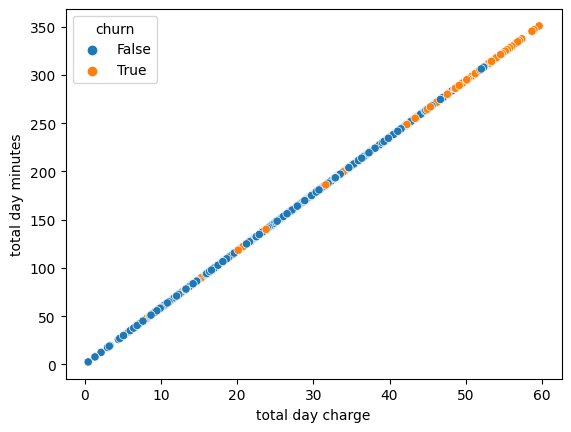

In [235]:
scatterplot(df, 'total day charge', 'total day minutes', 'churn')

> ### iii. Data Preprocessing

>> #### Dummy variables

>> #### One hot encoding

In [236]:
X = df.drop(['churn'], axis= 'columns')
y = df.churn

X.head()


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [237]:
X['international plan'] = X['international plan'].map({'yes':1, 'no':0})
X['voice mail plan'] = X['voice mail plan'].map({'yes':1, 'no':0})
X = X.drop(['state'], axis='columns')

In [238]:
X.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [239]:
#from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns.
#ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")

# fit ohe on small train data
#ohe.fit(X[['state']])

# access the column names of the states
#col_names = ohe.categories_[0]

# make a df with encoded states
#train_state_encoded = pd.DataFrame(ohe.transform(X[["state"]]), 
#                               index = X.index, 
#                               columns = col_names)

#X = train_state_encoded

#X.head()

In [240]:

# One-hot encode categorical columns.
#ohe = OneHotEncoder(sparse= False, categories='auto', handle_unknown = "ignore")

# fit ohe on small train data
#ohe.fit(X)

# access the column names of the states
#col_names = ohe.categories_[0]

# make a df with encoded states
#train_state_encoded = pd.DataFrame(ohe.transform(X), 
#                               index = X.index)

#X = train_state_encoded
#X

>> #### Splitting Data

In [241]:
# splitting the data into training and testig sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


>>  #### Scaling Data

In [242]:
#Instantiating the scaler
scaler = StandardScaler()

# Scaling the Training dataset.

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## MODELING

In this section several models were applied including:
> . Logistic Regression

> . Random Forest

> . Decision 

>>> i. Baseline Model

In [243]:
np.bincount(y_test)

array([697, 108])

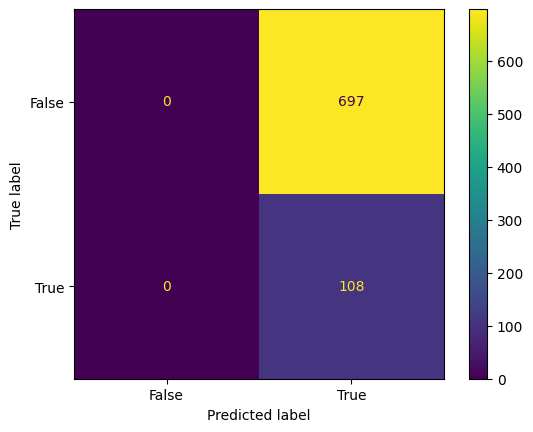

In [244]:
# Careation of a Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier

ConfusionMatrixDisplay.from_estimator(estimator=DummyClassifier(strategy='constant', constant=1).fit(X_train, y_train),
                                       X=X_test, y=y_test);

In [249]:
TP = 108
TN = 0
FP = 697
FN = 0
baseline_accuracy = (TP + TN)/(TN+TP+FN+FP)
baseline_recall = TP/(FN + TP)
baseline_precision = TP/(TP+FP)
baseline_f1 = (2*(baseline_precision*baseline_recall))/(baseline_recall+baseline_precision)

print(f'Accuracy:', {baseline_accuracy})
print(f'recall:', {baseline_recall})
print(f'precision:', {baseline_precision})
print(f'F1_Score:',{baseline_f1})


Accuracy: {0.1341614906832298}
recall: {1.0}
precision: {0.1341614906832298}
F1_Score: {0.2365826944140197}


The base-line model has an accuracy of about 15%,

>>> ii. Logistic Regression 

In [253]:

from imblearn.over_sampling import SMOTE

# Ensure X_train and X_test are scaled DataFrames
X_train1 = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test1 = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_scaled, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fd402382cb0>
Traceback (most recent call last):
  File "/home/victor/anaconda3/envs/learn-env/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/victor/anaconda3/envs/learn-env/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/victor/anaconda3/envs/learn-env/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/victor/anaconda3/envs/learn-env/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


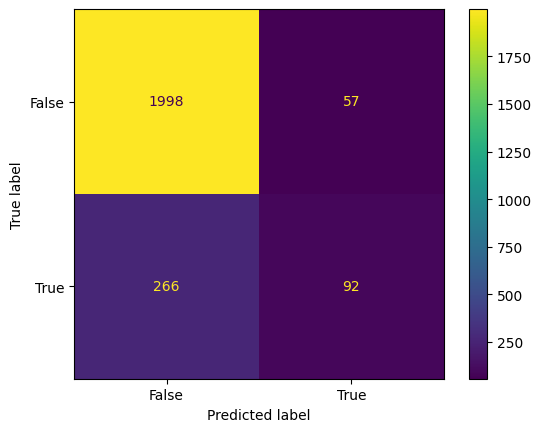

In [259]:

model = LogisticRegression(random_state=42)

model.fit(X_train_scaled ,y_train )

ConfusionMatrixDisplay.from_estimator(estimator=model, X=X_train_scaled, y=y_train);

In [260]:
# Perform cross-validation
cv_scores = cross_val_score(model,X_train_scaled,y_train, cv=3)

cv_scores

array([0.85590062, 0.87437811, 0.85820896])

In [261]:
model_accuracy = accuracy_score(y_test,model.predict(X_test_scaled))
model_recall = recall_score(y_test, model.predict(X_test_scaled))
model_precision = precision_score(y_test, model.predict(X_test_scaled))
model_f1 = f1_score(y_test, model.predict(X_test_scaled))
# YOUR CODE HERE
#raise NotImplementedError()

print(f"""
Accuracy
Baseline: {baseline_accuracy:1.3f} Fitted Model: {model_accuracy:1.3f}
Recall
Baseline: {baseline_recall:1.3f} Fitted Model: {model_recall:1.3f}
Precision
Baseline: {baseline_precision:1.3f} Fitted Model: {model_precision:1.3f}
F1 Score
Baseline: {baseline_f1:1.3f} Fitted Model: {model_f1:1.3f}
""")


Accuracy
Baseline: 0.134 Fitted Model: 0.860
Recall
Baseline: 1.000 Fitted Model: 0.167
Precision
Baseline: 0.134 Fitted Model: 0.439
F1 Score
Baseline: 0.237 Fitted Model: 0.242



>> #### iii. Decision Trees

In [264]:
# Instatiating

des = DecisionTreeRegressor(random_state=1)

# Fit the model to the training data here
des.fit(X_train,y_train)

# YOUR CODE HERE
#raise NotImplementedError()

# Testing out the model's r2 score on the training data overall
dt_train_score = des.score(X_train, y_train)
dt_train_score

1.0

## EVALUATION

## DEPLOYMENT